# Initial Dataset Evaluation 
Author: Keanna Knebel 

Date: 2020/05/06

In [29]:
import pandas as pd
import dask.dataframe as dd
import geopandas as gpd
import altair as alt
import json
from sklearn.model_selection import GroupShuffleSplit

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [19]:
# look at census data for 2016
census_2016 = pd.read_csv('../data/raw/census_2016.csv', skiprows=4, encoding='latin-1')
census_2016

,ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
0,1,Total - Age groups and average age of the pop...,"15,295","62,030","21,425","33,620","29,175","34,575","49,325","13,975",...,"22,555","8,430","7,970","12,585","36,500","31,065","47,200","13,065","631,485","2,463,430"
1,2,0 to 14 years,2015,4000,3545,2580,3210,4595,7060,1880,...,3415,1175,1105,1065,5460,3790,1945,1900,70530,362110
2,3,0 to 4 years,455,2080,675,1240,1320,1510,2515,430,...,1175,270,360,360,1695,1175,965,420,24615,116270
3,4,5 to 9 years,685,1105,1225,760,1025,1560,2390,600,...,1160,405,365,365,1780,1210,560,670,22905,122730
4,5,10 to 14 years,880,810,1650,580,865,1525,2160,845,...,1080,500,375,340,1985,1410,415,810,23010,123110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,5489,Non-Aboriginal,360,1300,335,505,305,750,1125,360,...,350,120,115,125,850,945,915,215,13300,46615
5585,5490,English and French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,15
5586,5491,English and non-official language,10,10,0,0,0,15,20,10,...,0,0,0,0,10,30,0,0,190,580
5587,5492,French and non-official language,0,15,10,20,10,0,20,0,...,10,15,10,0,0,15,20,10,265,685


In [103]:
# look at census data for 2001
census_2001 = pd.read_csv('../data/raw/census_2001.csv', skiprows=4, encoding='latin-1')
census_2001.head()

,Unnamed: 0,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD (City of Vancouver),Vancouver CMA (Metro Vancouver)
0,Total population by sex and age groups - 100%...,"14,515","27,990","21,310","28,405","29,085","33,045","44,560","14,035","25,785",...,"21,990","9,020","6,995","11,575","33,425","27,150","42,120","12,680","545,675","1,986,965"
1,Male,"6,540","16,430","10,410","12,435","14,400","16,225","21,975","6,480","12,160",...,"10,470","4,300","3,310","6,525","16,505","13,025","21,995","6,020","267,700","972,730"
2,0 - 4,220,360,485,440,740,930,"1,325",245,585,...,605,155,165,165,"1,180",615,395,255,"11,990","53,850"
3,5 - 9,270,215,620,270,700,"1,010","1,460",325,785,...,530,185,170,205,"1,160",765,240,270,"12,320","60,800"
4,10 - 14,465,165,850,220,575,960,"1,345",465,855,...,535,305,175,190,"1,055",890,190,405,"12,835","62,805"


In [32]:
# load GeoJSON of vancouver area boundaries
van_areas = gpd.read_file('../data/raw/local_area_boundary.geojson')
van_areas.head()

,mapid,name,geometry
0,AR,Arbutus-Ridge,"POLYGON ((-123.15260 49.25723, -123.16488 49.2..."
1,CBD,Downtown,"POLYGON ((-123.11227 49.29016, -123.10424 49.2..."
2,FAIR,Fairview,"POLYGON ((-123.14599 49.25712, -123.14540 49.2..."
3,GW,Grandview-Woodland,"POLYGON ((-123.07702 49.29025, -123.06778 49.2..."
4,HS,Hastings-Sunrise,"POLYGON ((-123.05649 49.29349, -123.05190 49.2..."


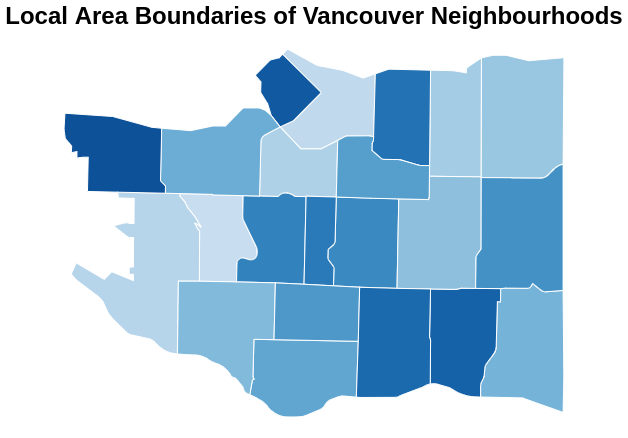

In [104]:
# convert Geopandas Dataframe back to GeoJSON
choro_json = json.loads(van_areas.to_json())
choro_data = alt.Data(values=choro_json['features'])

label = alt.selection_single(
    fields=["properties.name"],
    on='mouseover',  # select on mouseover events   
    empty='none'     
)

# map choropleth layer
choro = alt.Chart(choro_data
    ).mark_geoshape(stroke='white'
    ).encode(
        alt.Color('properties.name:N',
                  scale=alt.Scale(scheme='blues'),
                  title = 'Neighbourhood',
                 legend=None),
        tooltip = [alt.Tooltip('properties.name:N', title='Neighbourhood')]
    ).properties(
        width=500,
        height=400,
        background='transparent',
        title="Local Area Boundaries of Vancouver Neighbourhoods"
    ).configure_view(strokeWidth=0
    ).configure_title(fontSize=24
    ).add_selection(label)


choro  
#choro.save("../figures/van_area_map.png")

In [33]:
# buisness licence dataset
licence_df = pd.read_csv('../data/processed/licences.csv')
licence_df

/home/keanna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,business_id,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,...,Street,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom
0,1,18.0,3100450,18-516072,0.0,!Exotics BySIYTHE Corporation,NaN,Issued,2018-02-14,2018-12-31,...,RICHARDS ST,Vancouver,BC,CA,V6B 2Z4,Downtown,1.0,189.0,2020-04-01T09:32:19Z,"{""type"": ""Point"", ""coordinates"": [-123.1119263..."
1,1,19.0,3265242,19-139570,0.0,!Exotics BySIYTHE Corporation,NaN,Pending,2019-08-15,2019-12-31,...,RICHARDS ST,Vancouver,BC,CA,V6B 2Z4,Downtown,1.0,50.0,2020-04-01T09:32:24Z,"{""type"": ""Point"", ""coordinates"": [-123.1119263..."
2,2,4.0,804123,04-036444,0.0,.243 Racing Inc,NaN,Issued,2004-04-07,2004-12-31,...,POWELL ST,Vancouver,BC,CA,V5L 1H6,Grandview-Woodland,0.0,100.0,2019-07-21T13:48:32Z,"{""type"": ""Point"", ""coordinates"": [-123.0693914..."
3,2,5.0,884526,05-112560,0.0,.243 Racing Inc,NaN,Issued,2004-12-23,2005-12-31,...,POWELL ST,Vancouver,BC,CA,V5L 1H6,Grandview-Woodland,0.0,103.0,2019-07-21T13:48:35Z,"{""type"": ""Point"", ""coordinates"": [-123.0693914..."
4,2,6.0,1010837,06-140328,0.0,.243 Racing Inc,NaN,Issued,2005-12-12,2006-12-31,...,POWELL ST,Vancouver,BC,CA,V5L 1H6,Grandview-Woodland,0.0,106.0,2019-07-21T13:48:41Z,"{""type"": ""Point"", ""coordinates"": [-123.0693914..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463265,241465,18.0,3214527,18-629678,0.0,NaN,NaN,Pending,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-01T09:32:14Z,NaN
1463266,241465,20.0,3580571,20-214973,0.0,NaN,NaN,Pending,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-04T07:08:41Z,NaN
1463267,241465,20.0,3542917,20-177747,0.0,NaN,NaN,Cancelled,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-04T07:08:41Z,NaN
1463268,241465,20.0,3560217,20-194843,0.0,NaN,NaN,Cancelled,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-04T07:08:41Z,NaN


In [34]:
# split into train and test sets
train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(licence_df, groups=licence_df['business_id']))

train = licence_df.iloc[train_inds]
test = licence_df.iloc[test_inds]

# save as csv files
train.to_csv('../data/processed/licence_train.csv')
test.to_csv('../data/processed/licence_test.csv')

In [69]:
train.iloc[:,[0,5,7,8,9,10,11,15,16,19,20,21]].head(8)

,business_id,BusinessName,Status,IssuedDate,ExpiredDate,BusinessType,BusinessSubType,Street,City,PostalCode,LocalArea,NumberofEmployees
0,1,!Exotics BySIYTHE Corporation,Issued,2018-02-14,2018-12-31,Office,Design Company,RICHARDS ST,Vancouver,V6B 2Z4,Downtown,1.0
1,1,!Exotics BySIYTHE Corporation,Pending,2019-08-15,2019-12-31,Office,Design Company,RICHARDS ST,Vancouver,V6B 2Z4,Downtown,1.0
6,3,.243 Racing Inc,Issued,2003-04-08,2003-12-31,Wholesale Dealer,NaN,Homer St,Vancouver,V6B 2V2,Downtown,0.0
7,3,.243 Racing Inc,Issued,2003-04-08,2003-12-31,Office,Design Company,Homer St,Vancouver,V6B 2V2,Downtown,0.0
8,3,.243 Racing Inc,Gone Out of Business,NaN,NaN,Office,Design Company,Homer St,Vancouver,V6B 2V2,Downtown,0.0
10,5,"""Mata Hari's"" of Gentlemen's Leisure Spa Inc",Issued,1999-03-24,1999-12-31,Health Services,Other,Hornby St,Vancouver,V6Z 2L4,Downtown,0.0
11,5,"""Mata Hari's"" of Gentlemen's Leisure Spa Inc",Issued,2000-01-11,2000-12-31,Health Services,Other,Hornby St,Vancouver,V6Z 2L4,Downtown,0.0
12,5,"""Mata Hari's"" of Gentlemen's Leisure Spa Inc",Gone Out of Business,NaN,NaN,Health Services,Other,Hornby St,Vancouver,V6Z 2L4,Downtown,0.0
